# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team 27, Harmony**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor



# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#load the data
df= pd.read_csv('df_train.csv',index_col=0)
df_test= pd.read_csv('df_test.csv',index_col=0)


## Basic Information of our data

we are trying to observe our data with few basic commands of analysis

In [3]:
#first five rows
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
#information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [5]:
#total number of columns and rows
df.shape

(8763, 48)

In [6]:
#checking for null values
df.isnull().sum().sum()

2068

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


## Plot relevant feature interactions

<AxesSubplot:xlabel='Valencia_pressure'>

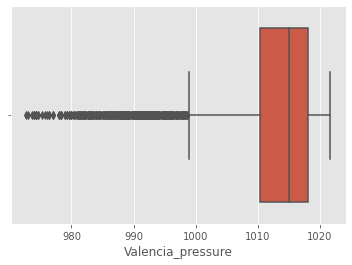

In [8]:
#cheking for outliers
plt.style.use('ggplot')
sns.boxplot(df['Valencia_pressure'])

In [9]:
# evaluate correlation

In [10]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## Remove missing values/ features

In [11]:
#checking how different the descriptive statistics   in the values  
print("Mean:", df['Valencia_pressure'].mean())
print("Mode:", df['Valencia_pressure'].mode())
print("Median:", df['Valencia_pressure'].median())

Mean: 1012.0514065222828
Mode: 0    1018.0
dtype: float64
Median: 1015.0


In [12]:
#replacing null values with mode


df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])


In [13]:
#checking for nulls
df.isnull().sum().sum()

0

## engineer existing features

In [14]:
# create new features
#convert datatypes
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year   
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day       
df['hour'] = df['time'].dt.hour  

In [15]:
#extracting numbers because levels are not the same so we can't use dummies
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')#with this we saying go find the number

In [16]:
df['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [17]:
#convert datatype to numeric
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])

In [18]:

df['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [19]:
#extracting numbers 
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')#with this we saying go find the number


In [20]:
df['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: object

In [21]:
#convert datatype to numeric
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])

## Scaling

In [22]:

X = df.drop(['load_shortfall_3h','time'],axis=1)
y = df['load_shortfall_3h']

In [23]:

#create a scaler object
scal = StandardScaler()

In [24]:
X_scaled = scal.fit_transform(X)

In [25]:
#convert
X_standardise = pd.DataFrame(X_scaled, columns=X.columns)
X_standardise.head() .T

,0,1,2,3,4
Madrid_wind_speed,-0.950708,-1.130863,-0.770554,-0.770554,-0.770554
Valencia_wind_deg,-0.096053,1.641580,1.294054,0.946527,0.599000
Bilbao_rain_1h,-0.362123,-0.362123,-0.362123,-0.362123,-0.362123
Valencia_wind_speed,-0.796169,-0.381412,-0.657917,-0.657917,-0.657917
Seville_humidity,0.516117,0.692953,0.383491,0.118238,-0.161751
Madrid_humidity,0.270621,0.298017,0.284319,-0.044439,-0.017043
Bilbao_clouds_all,-1.335491,-1.335491,-1.335491,-1.335491,-1.274045
Bilbao_wind_speed,-0.501451,-0.501451,-0.501451,-0.501451,-0.894581
Seville_clouds_all,-0.565065,-0.565065,-0.565065,-0.565065,-0.565065
Bilbao_wind_deg,0.630823,0.607959,0.542632,0.398912,0.255192


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [26]:
# split data 
x = df.drop(['load_shortfall_3h','time'],axis=1)
y = df['load_shortfall_3h']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3332, random_state=PARAMETER_CONSTANT)


In [27]:
y.isnull().sum().sum()

0

## Linear model

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [31]:
#replacing null values in df_test dataset
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [32]:
df_test.isnull().sum().sum()

0

In [33]:
print('RMSE' + ' '+ str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE 4787.8735367086065


In [34]:
print('R_squared:', metrics.r2_score(y_test, y_pred_test))


R_squared: 0.17919666009215884


## Submission preparation

In [35]:
#creating a copy of the test dataframe
df_test1 = df_test.copy()

In [36]:
#extracting numeric values 
df_test1['Seville_pressure'] = df_test1['Seville_pressure'].str.extract('(\d+)')

In [37]:
#extracting numeric values 
df_test1['Valencia_wind_deg'] = df_test1['Valencia_wind_deg'].str.extract('(\d+)')

In [38]:
#changing to numeric values
df_test1['Seville_pressure'] = pd.to_numeric(df_test1['Seville_pressure'])

In [39]:
#changing to numeric values
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])

In [40]:
df_test1.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [41]:
df_test1['time'] = pd.to_datetime(df_test1['time'])
df_test1['year'] = df_test1['time'].dt.year   
df_test1['month'] = df_test1['time'].dt.month
df_test1['day'] = df_test1['time'].dt.day       
df_test1['hour'] = df_test1['time'].dt.hour  

In [42]:
df_test1.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [43]:
df_test1 = df_test1.drop(['time'], axis=1)

In [44]:
#creating an output dataframe
y_pred_test = lr.predict(df_test1)
final = pd.DataFrame(y_pred_test, columns=['load_shortfall_3h'])
output = pd.DataFrame({"time": df_test["time"].reset_index(drop=True)})
submission = output.join(final)
submission.to_csv("submission6.csv", index=False)
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7604.934363
1,2018-01-01 03:00:00,7213.717049
2,2018-01-01 06:00:00,8276.769345
3,2018-01-01 09:00:00,8321.722532
4,2018-01-01 12:00:00,8385.197905
...,...,...
2915,2018-12-31 09:00:00,10388.644118
2916,2018-12-31 12:00:00,12430.508273
2917,2018-12-31 15:00:00,14385.605864
2918,2018-12-31 18:00:00,14174.491689


## Random Forests model

In [45]:
# Our forest consists of 100 trees with a max depth 
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [46]:
# Get predictions

y_pred = RF.predict(x_test)

# Compute RMSE

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 4129.285464013131


In [52]:
#y_pred_test = lr.predict(df_test1)
y_pred = RF.predict(df_test1)
final = pd.DataFrame(y_pred , columns=['load_shortfall_3h'])
output = pd.DataFrame({"time": df_test["time"].reset_index(drop=True)})
submissionf = output.join(final)
submission.to_csv("randomforest.csv", index=False)
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10790.146682
1,2018-01-01 03:00:00,8165.649847
2,2018-01-01 06:00:00,8152.995754
3,2018-01-01 09:00:00,9332.488872
4,2018-01-01 12:00:00,10214.635731
...,...,...
2915,2018-12-31 09:00:00,10892.959935
2916,2018-12-31 12:00:00,13473.074130
2917,2018-12-31 15:00:00,14336.154330
2918,2018-12-31 18:00:00,14635.998937


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [48]:
# Compare model performance

In [49]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [50]:
# discuss chosen methods logic